## Compute parameters using the 'Batch Gradient Descent' algorithm 

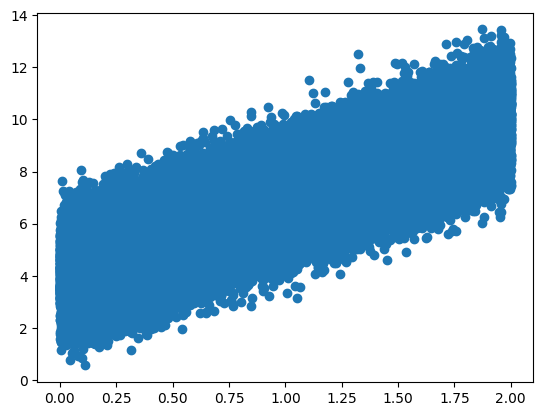

In [26]:
# Generating some random data
import numpy as np
import matplotlib.pyplot as plt
import time 

# Generate some data
np.random.seed(42)
m = 100000
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector | y = 4 + 3x + noise

# Visualizing the data
plt.scatter(X, y)
plt.show()

In [27]:
# Define a function to keep track of how long each implementation runs for
def log_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"The runtime for {func.__name__}: {end_time - start_time}")
        return result
    return wrapper

In [28]:
# Transform the input data
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Define a function to compute the parameters using 'The Normal Equation' (theta)
@log_time
def normal_equation(X, y):
    computed_params = np.linalg.inv(X.T @ X) @ (X.T @ y) # 'Normal Equation'
    return computed_params

# Define a function to compute the parameters using BGD
@log_time
def batch_gradient_descent(X, y, *, learning_rate: float = 0.01, n_epochs: int = 1000,
                           tolerance: float = 1e-6):
    theta = np.random.randn(X.shape[1], 1) # random init
    m = X.shape[0] # number of instances

    cost_list = []
    epochs_list = []

    for epoch in range(n_epochs):
        # Make a prediction
        y_pred = X @ theta

        # Compute the grad
        gradients = 2 / m * X.T @ (y_pred - y)

        # Adjust theta
        theta = theta - learning_rate * gradients

        # Check for convergence
        if np.linalg.norm(gradients) < tolerance:
            break

        if epoch % 100 == 0:
            cost = np.mean((y_pred - y)**2)
            cost_list.append(cost)
            epochs_list.append(epoch)
    return theta, cost_list, epochs_list

In [29]:
# Define a predict function
def predict(X, theta):
    return X @ theta

theta_1 = normal_equation(X, y)
theta_2, costs, epochs = batch_gradient_descent(X, y, learning_rate=0.01)

print(f"The Normal Equation:\n {theta_1}")
print(f"\nBGD:\n {theta_2}")

The runtime for normal_equation: 0.0010139942169189453
The runtime for batch_gradient_descent: 1.743161678314209
The Normal Equation:
 [[3.99975188]
 [3.00286689]]

BGD:
 [[4.03834742]
 [2.97013153]]


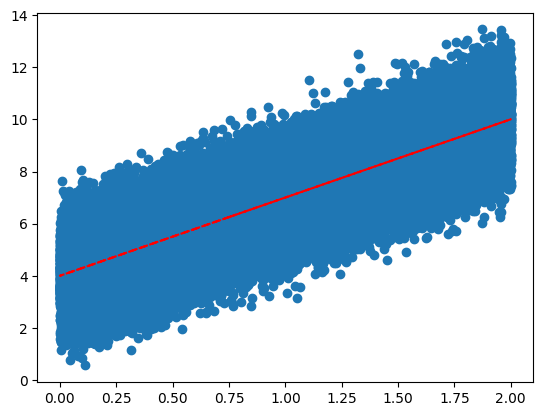

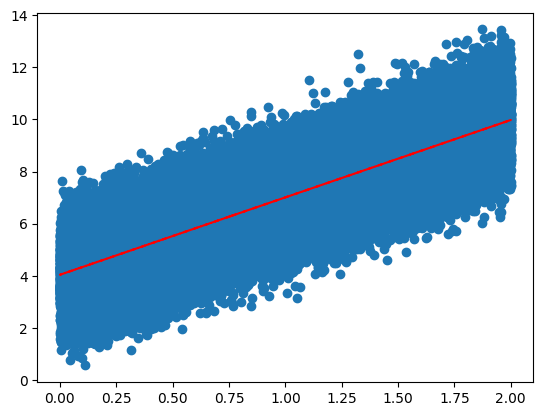

In [30]:
# Make some preds
NE_preds = predict(X, theta_1)
BGD_preds = predict(X, theta_2)

# Plot the 'lines of best fit'
np.random.seed(42)
m = 100000
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector | y = 4 + 3x + noise

# Visualize the results for 'The Normal Equation' 
plt.scatter(X, y)
plt.plot(X, NE_preds, 'r--')
plt.show()

# Visualize the results for the BGD algo
plt.scatter(X, y)
plt.plot(X, BGD_preds, 'r--')
plt.show()

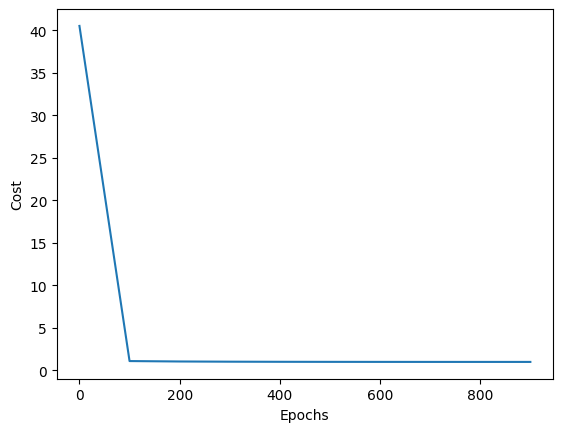

In [31]:
# Plot cost over epochs
plt.plot(epochs, costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()